In [1]:
import pandas as pd 
import numpy as np 
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense , Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os 
import cv2 
import matplotlib.pyplot as plt


In [2]:
Data1 = 'F:\my\code folder\plak prosesing\dataset2'
Data2 = 'F:\my\code folder\plak prosesing\dataset1\Kurdish_Handwritten_Character_Database'
# x , y
Dimension = []
Label = []

file1 = os.listdir(Data1)
file2 = os.listdir(Data2)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'F:\\my\\code folder\\plak prosesing\\dataset2'

In [ ]:
# Assuming file2 contains the Persian letter folder names
alphabet = [str(fc) for fc in file2]
label_map = {char: i + 10 for i, char in enumerate(alphabet)}
print("label_map:", label_map)
print("Length of alphabet:", len(alphabet))  # Should be 26

label_map: {'10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '21': 21, '22': 22, '23': 23, '24': 24, '25': 25, '26': 26, '27': 27, '28': 28, '29': 29, '30': 30, '31': 31, '32': 32, '33': 33, '34': 34, '35': 35}
Length of alphabet: 26


In [ ]:
for folder in file1:
    all_folder = os.path.join(Data1, folder)

    for pic in os.listdir(all_folder):
        all_pic = os.path.join(all_folder, pic)
        img = cv2.imread(all_pic)

        if img is None:
            print(f"Error loading image: {all_pic}")
            continue

        img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img2 = cv2.resize(img1, (32, 32))

        if img2.shape != (32, 32):
            print(f"Skipping image {all_pic} due to shape mismatch: {img2.shape}")
            continue

        Dimension.append(img2)
        Label.append(int(folder))

# تبدیل به آرایه numpy با بررسی نوع داده
x1 = np.array(Dimension, dtype=np.float32)
y1 = np.array(Label, dtype=np.int32)

print(x1.shape)
print(y1.shape)


(80000, 32, 32)
(80000,)


In [ ]:
for folder in file2:
    all_folder = os.path.join(Data2, folder)

    for pic in os.listdir(all_folder):
        all_pic = os.path.join(all_folder, pic)
        img = cv2.imread(all_pic)

        if img is None:
            print(f"Error loading image: {all_pic}")
            continue

        img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img2 = cv2.resize(img1, (32, 32))

        if img2.shape != (32, 32):
            print(f"Skipping image {all_pic} due to shape mismatch: {img2.shape}")
            continue

        Dimension.append(img2)
        Label.append(int(folder))

# تبدیل به آرایه numpy با بررسی نوع داده
x2 = np.array(Dimension, dtype=np.float32)
y2 = np.array(Label, dtype=np.int32)

print(x2.shape)
print(y2.shape)


(110611, 32, 32)
(110611,)


In [ ]:
# ترکیب داده‌ها
x = np.concatenate((x1, x2), axis=0)
y = np.concatenate((y1, y2), axis=0)

print("Shape of combined x:", x.shape)  # باید (111962, 32, 32) باشه
print("Shape of combined y:", y.shape)  # باید (111962,) باشه
print("Unique labels:", np.unique(y))

Shape of combined x: (190611, 32, 32)
Shape of combined y: (190611,)
Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


In [ ]:
# تقسیم داده‌ها به آموزش و آزمایش (80% آموزش، 20% آزمایش)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# آماده‌سازی داده‌های آموزش
x_train = np.array(x_train).reshape(-1, 32, 32, 1) / 255.0  # تبدیل به شکل مناسب و نرمال‌سازی
num_classes = len(set(y))  # تعداد کلاس‌ها
y_train = to_categorical(y_train, num_classes=num_classes)  # تبدیل به one-hot

# آماده‌سازی داده‌های آزمایش
x_test = np.array(x_test).reshape(-1, 32, 32, 1) / 255.0  # تبدیل به شکل مناسب و نرمال‌سازی
y_test = to_categorical(y_test, num_classes=num_classes)  # تبدیل به one-hot

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')  # تعداد کلاس‌ها بستگی به داده‌ها داره
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 233,252 (911.14 KB)

 Trainable params: 233,252 (911.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2  , validation_data=(x_test , y_test))

Epoch 1/10
4766/4766 ━━━━━━━━━━━━━━━━━━━━ 78s 15ms/step - accuracy: 0.8268 - loss: 0.5932 - val_accuracy: 0.9287 - val_loss: 0.2155
Epoch 2/10
4766/4766 ━━━━━━━━━━━━━━━━━━━━ 84s 18ms/step - accuracy: 0.9376 - loss: 0.1853 - val_accuracy: 0.9475 - val_loss: 0.1577
Epoch 3/10
4766/4766 ━━━━━━━━━━━━━━━━━━━━ 84s 18ms/step - accuracy: 0.9540 - loss: 0.1333 - val_accuracy: 0.9512 - val_loss: 0.1440
Epoch 4/10
4766/4766 ━━━━━━━━━━━━━━━━━━━━ 80s 17ms/step - accuracy: 0.9630 - loss: 0.1094 - val_accuracy: 0.9466 - val_loss: 0.1740
Epoch 5/10
4766/4766 ━━━━━━━━━━━━━━━━━━━━ 79s 17ms/step - accuracy: 0.9688 - loss: 0.0917 - val_accuracy: 0.9562 - val_loss: 0.1358
Epoch 6/10
4766/4766 ━━━━━━━━━━━━━━━━━━━━ 91s 19ms/step - accuracy: 0.9721 - loss: 0.0800 - val_accuracy: 0.9593 - val_loss: 0.1263
Epoch 7/10
4766/4766 ━━━━━━━━━━━━━━━━━━━━ 86s 18ms/step - accuracy: 0.9755 - loss: 0.0702 - val_accuracy: 0.9624 - val_loss: 0.1281
Epoch 8/10
4766/4766 ━━━━━━━━━━━━━━━━━━━━ 88s 18ms/step - accuracy: 0.9786 -

In [ ]:
# ارزیابی مدل روی داده‌های تست
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

1192/1192 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9613 - loss: 0.1481
Test Loss: 0.1479
Test Accuracy: 0.9608


In [ ]:
out = model.predict(x_test)

1192/1192 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step


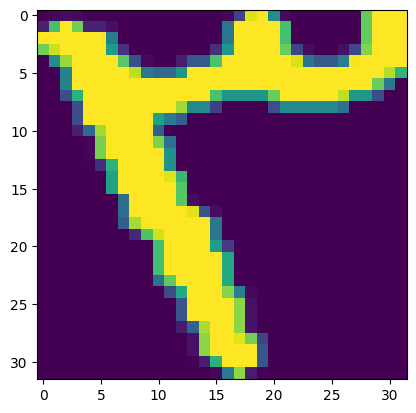

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
i = 1
plt.close()
1
plt.imshow(x_test[i])

plt.show()

print(y_test[i])
print(out[i])

In [ ]:
# model.save('plakmodel.h5')